In [1]:
# bars_metrics

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as colors
import geopandas as gpd

In [3]:
folder = 'Z:\\1.Data\\Honduras\\results\\metrics\\'
geo_folder = 'Z:\\1.Data\\Honduras\\raw\\'
monthly_file='prec_metrics_monthly.csv'
overall_file='prec_metrics_overall.csv'
geo_file = 'groups_prec.csv'

In [4]:
test = pd.read_csv(folder+overall_file).rename(
        columns={'Unnamed: 0':'estacion'})

In [5]:
geo=  pd.read_csv(geo_folder+geo_file).rename(
        columns={'Unnamed: 0':'estacion'})
geo['cuenca'].replace('altlantico', 'atlantico', inplace=True)


In [6]:
info = test.merge(geo, how='inner', on='estacion')

In [7]:
medians_info = info.groupby(['source', 'cuenca']).agg(
    r2_median=('r2', 'median'),
    kendall_median=('kendall', 'median'),
    maape_median=('maape', 'median')
)
medians_info =medians_info.reset_index()
medians_info

,source,cuenca,r2_median,kendall_median,maape_median
0,agera5,atlantico,0.320231,0.634485,0.578448
1,agera5,pacifico,0.674031,0.733684,0.691176
2,chirps,atlantico,0.629606,0.664676,0.476099
3,chirps,pacifico,0.773342,0.747742,0.655369
4,imerg,atlantico,0.397002,0.569765,0.585874
5,imerg,pacifico,0.565143,0.707632,0.701450
6,mswep,atlantico,0.386679,0.596644,0.531675
7,mswep,pacifico,0.652842,0.732389,0.619428


In [54]:

palette = {
    'atlantico': 'tab:orange',
    'pacifico': 'tab:blue',
}


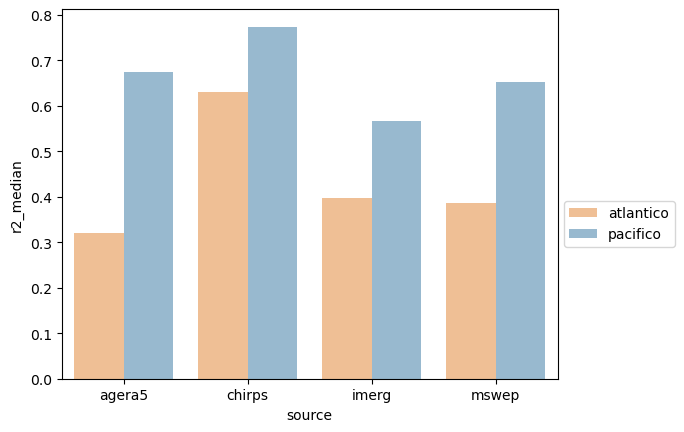

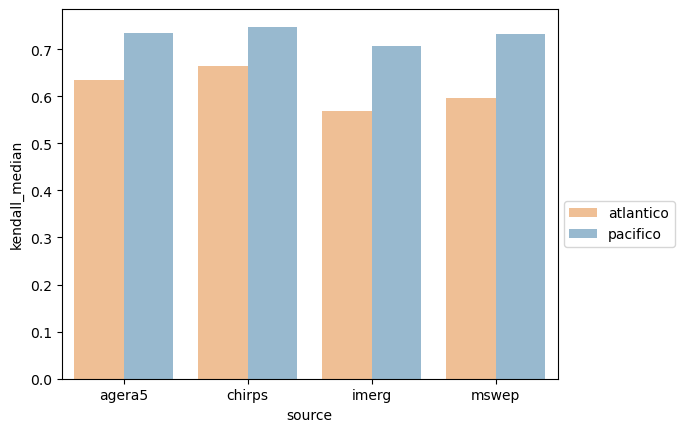

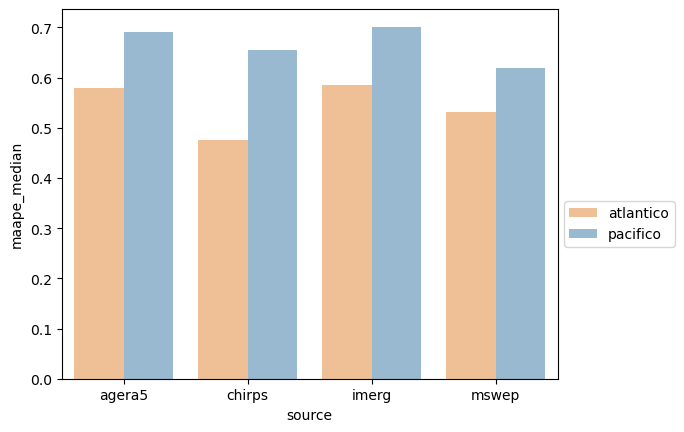

In [58]:
sns.barplot(data=medians_info, x="source", y="r2_median", hue="cuenca", alpha=0.5, palette=palette)
plt.legend(loc='best',bbox_to_anchor=(1.25, 0.5))
plt.show();
sns.barplot(data=medians_info, x="source", y="kendall_median", hue="cuenca", alpha=0.5, palette=palette)
plt.legend(loc='best',bbox_to_anchor=(1.25, 0.5))
plt.show();
sns.barplot(data=medians_info, x="source", y="maape_median", hue="cuenca", alpha=0.5, palette=palette)
plt.legend(loc='best',bbox_to_anchor=(1.25, 0.5))

# per month

In [59]:
monthly_data = pd.read_csv(folder+monthly_file).rename(
        columns={'Unnamed: 0':'estacion'})
monthly_data.head(2)

,estacion,r2,rmse,kendall,spearman,mape,maape,month,source
0,ESQUIAS,-1.367041,177.860418,0.111111,0.248485,71.628811,0.601725,1,imerg
1,LA ERMITA,-1.146422,189.365515,0.117647,0.186275,108.179732,0.625398,1,imerg


In [60]:
info_monthly = monthly_data.merge(geo, how='inner', on='estacion')
info_monthly

,estacion,r2,rmse,kendall,spearman,mape,maape,month,source,Lat,Lon,cuenca
0,ESQUIAS,-1.367041,177.860418,0.111111,0.248485,71.628811,0.601725,1,imerg,14.741389,-87.369444,atlantico
1,ESQUIAS,-1.233215,203.206481,0.452981,0.647598,153.268962,0.694018,1,chirps,14.741389,-87.369444,atlantico
2,ESQUIAS,-1.065473,187.943220,0.214570,0.323799,102.071527,0.578375,1,mswep,14.741389,-87.369444,atlantico
3,ESQUIAS,-1.364967,215.194945,0.495365,0.661284,129.991698,0.684533,1,agera5,14.741389,-87.369444,atlantico
4,ESQUIAS,-47.170232,1044.033943,0.391812,0.558728,288.676084,0.879514,2,imerg,14.741389,-87.369444,atlantico
...,...,...,...,...,...,...,...,...,...,...,...,...
2203,POTRERILLOS,-13.731000,13102.334225,0.318318,0.474395,688.050635,1.135251,11,agera5,15.229860,-87.963990,pacifico
2204,POTRERILLOS,-0.965160,332.949379,0.316847,0.497416,185.836689,0.634390,12,imerg,15.229860,-87.963990,pacifico
2205,POTRERILLOS,-54.282887,6170.393839,0.055688,0.062822,1731.748770,1.368328,12,chirps,15.229860,-87.963990,pacifico
2206,POTRERILLOS,-191.641076,21501.614388,0.009554,0.012745,3298.461328,1.326386,12,mswep,15.229860,-87.963990,pacifico


In [61]:
medians_month_info = info_monthly.groupby(['source', 'cuenca', 'month']).agg(
    r2_median=('r2', 'median'),
    kendall_median=('kendall', 'median'),
    maape_median=('maape', 'median')
)
medians_month_info =medians_month_info.reset_index()
medians_month_info

,source,cuenca,month,r2_median,kendall_median,maape_median
0,agera5,atlantico,1,-0.883622,0.327273,0.571567
1,agera5,atlantico,2,-0.644342,0.420271,0.844159
2,agera5,atlantico,3,-0.529060,0.337931,0.747847
3,agera5,atlantico,4,-0.069114,0.355872,0.751865
4,agera5,atlantico,5,0.123813,0.441026,0.438564
...,...,...,...,...,...,...
91,mswep,pacifico,8,0.322815,0.588331,0.412815
92,mswep,pacifico,9,0.275605,0.481840,0.291480
93,mswep,pacifico,10,0.385625,0.568008,0.343993
94,mswep,pacifico,11,-7.776421,0.396405,0.715102


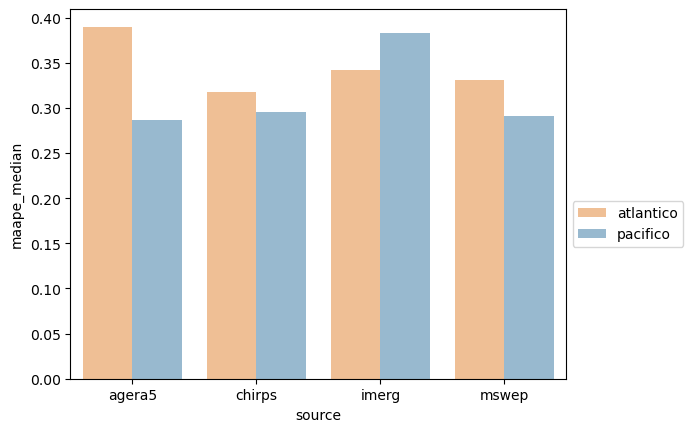

In [65]:
sns.barplot(data=medians_month_info[medians_month_info.month==9], x="source", y="maape_median", hue="cuenca", alpha=0.5, palette=palette)
plt.legend(loc='best',bbox_to_anchor=(1.25, 0.5))
plt.show();